### Importações e Configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Caminho para Salvar a Imagem

path_img = './outputs/plots/'

### Carregamento dos Dados com Engenharia de Atributos

In [ ]:
df = pd.read_csv('../3_feature_engineering/outputs/data/df_features.csv', parse_dates=['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,week,week_sin,week_cos,is_holiday,holiday_week,rolling_mean_4,lag_1,lag_52,Type_B,Type_C
0,1,1,2011-02-04,21665.76,False,42.27,2.989,0.0,0.0,0.0,...,5,0.568065,0.822984,0,0,18707.0275,18461.18,24924.50,False,False
1,1,1,2011-02-11,37887.17,True,36.39,3.022,0.0,0.0,0.0,...,6,0.663123,0.748511,1,6,23838.8950,21665.76,46039.49,False,False
2,1,1,2011-02-18,46845.87,False,57.36,3.045,0.0,0.0,0.0,...,7,0.748511,0.663123,0,0,31214.9950,37887.17,41595.55,False,False
3,1,1,2011-02-25,19363.83,False,62.90,3.065,0.0,0.0,0.0,...,8,0.822984,0.568065,0,0,31440.6575,46845.87,19403.54,False,False
4,1,1,2011-03-04,20327.61,False,59.58,3.288,0.0,0.0,0.0,...,9,0.885456,0.464723,0,0,31106.1200,19363.83,21827.90,False,False


### Seleção de Features

In [5]:
exclude_cols = [
    "Weekly_Sales",
    "Weekly_Sales_log",
    "Date"
]

num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c not in exclude_cols]

X = df[num_cols]

### Padronização das Variáveis

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA Completo

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

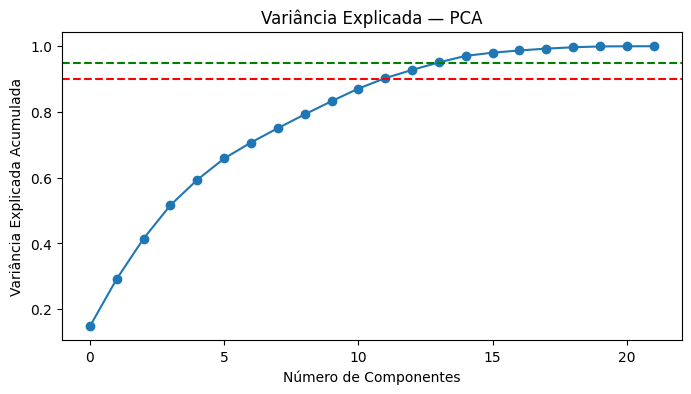

In [9]:
# Variância Explicada Acumulada

explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,4))
plt.plot(explained_var, marker="o")
plt.axhline(0.9, linestyle="--", color="red")
plt.axhline(0.95, linestyle="--", color="green")
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada — PCA")
plt.savefig(f'{path_img}Variancia_Explicada.png', dpi=300, bbox_inches='tight')
plt.show()

O gráfico de variância explicada mostra que aproximadamente **12 componentes principais** são suficientes para capturar **90% da variância total** dos dados, enquanto **14 componentes** explicam cerca de **95%**.

Considerando que o conjunto original possui 23 variáveis numéricas, esse resultado indica uma **redução efetiva de dimensionalidade de quase 50%**, evidenciando forte redundância de informação entre as features originais.

In [10]:
# Número Mínimo de Componentes

n_90 = np.argmax(explained_var >= 0.90) + 1
n_95 = np.argmax(explained_var >= 0.95) + 1

n_90, n_95

(np.int64(12), np.int64(14))

Os valores obtidos confirmam quantitativamente o comportamento observado no gráfico: apenas **12 componentes principais** concentram a maior parte da variabilidade dos dados.

Isso sugere que grande parte das variáveis explicativas carrega informação repetida, especialmente entre atributos temporais e defasagens, o que pode inflar variâncias dos coeficientes em modelos lineares tradicionais.

### PCA Reduzido (90% da Variância)

In [11]:
pca_90 = PCA(n_components=n_90)
X_pca_90 = pca_90.fit_transform(X_scaled)

### Loadings (Interpretação dos Componentes)

In [12]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(len(X.columns))]
)

loadings.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Store,0.015748,-0.097252,-0.009145,-0.085023,-0.338786
Dept,-0.009949,0.109021,-0.060196,-0.058784,-0.034751
Temperature,0.179773,-0.071598,-0.379530,0.183182,-0.034423
Fuel_Price,-0.038689,-0.082719,-0.284029,0.071047,-0.481938
MarkDown1,-0.228410,0.139155,0.114318,0.489122,-0.147333
MarkDown2,-0.016194,0.137853,0.310984,0.003248,-0.057345
MarkDown3,0.163680,0.102517,0.216955,-0.053110,-0.140354
MarkDown4,-0.219373,0.120685,0.124992,0.431829,-0.124301
MarkDown5,-0.063090,0.134985,0.084561,0.352958,0.037508
CPI,0.022763,0.012094,0.031727,0.085517,0.528040


A análise dos loadings revela padrões claros de agrupamento entre variáveis.  
Observa-se, por exemplo, que **month, week e week_sin** contribuem fortemente para o mesmo componente principal, indicando que representam essencialmente a mesma estrutura temporal sob diferentes codificações.

Da mesma forma, as variáveis **rolling_mean_4, lag_1 e lag_52** apresentam pesos elevados em um mesmo componente, evidenciando redundância entre informações de curto e longo prazo da série.

### Heatmap dos Loadings (Componentes Principais)

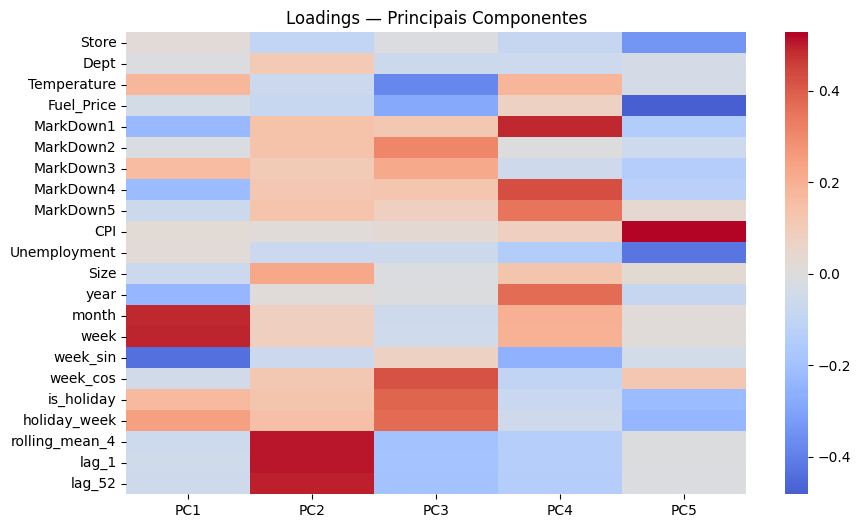

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(
    loadings.iloc[:, :5],
    cmap="coolwarm",
    center=0
)
plt.title("Loadings — Principais Componentes")
plt.savefig(f'{path_img}Principais_Componentes.png', dpi=300, bbox_inches='tight')
plt.show()

O heatmap dos loadings reforça visualmente a presença de **blocos de variáveis altamente correlacionadas**, especialmente entre atributos temporais, defasagens e médias móveis.

Essa estrutura confirma que o espaço original de features não é ortogonal, violando uma das premissas implícitas de modelos lineares clássicos e explicando a necessidade de técnicas de regularização ou redução de dimensionalidade.

### PCA vs Multicolinearidade

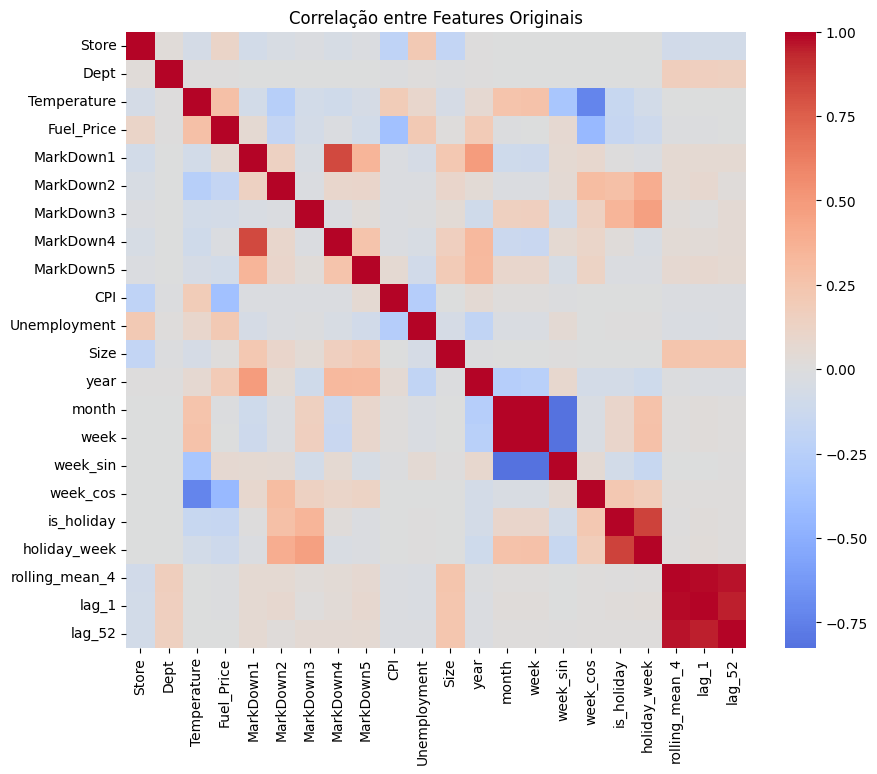

In [14]:
corr = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlação entre Features Originais")
plt.savefig(f'{path_img}Correlacao_Features_Originais.png', dpi=300, bbox_inches='tight')
plt.show()


O mapa de correlação evidencia correlações elevadas entre diversas variáveis, especialmente entre lags, médias móveis e componentes sazonais.

Esse padrão confirma empiricamente a presença de multicolinearidade, que pode levar a coeficientes instáveis e interpretação limitada em regressões lineares multivariadas sem regularização.